# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ust'-kut
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | forbes
Processing Record 9 of Set 1 | kismayo
Processing Record 10 of Set 1 | kenora
Processing Record 11 of Set 1 | warrnambool
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | myrina
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | ypsonas
Processing Record 22 of Set 1 | lebu
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,18.23,98,100,4.92,NZ,1706476466
1,stanley,54.8680,-1.6985,11.27,86,20,8.75,GB,1706476466
2,longyearbyen,78.2186,15.6401,-10.09,79,0,3.09,SJ,1706476248
3,bredasdorp,-34.5322,20.0403,20.04,77,100,1.00,ZA,1706476241
4,ust'-kut,56.7938,105.7672,-40.31,100,78,0.89,RU,1706476467


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,18.23,98,100,4.92,NZ,1706476466
1,stanley,54.8680,-1.6985,11.27,86,20,8.75,GB,1706476466
2,longyearbyen,78.2186,15.6401,-10.09,79,0,3.09,SJ,1706476248
3,bredasdorp,-34.5322,20.0403,20.04,77,100,1.00,ZA,1706476241
4,ust'-kut,56.7938,105.7672,-40.31,100,78,0.89,RU,1706476467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

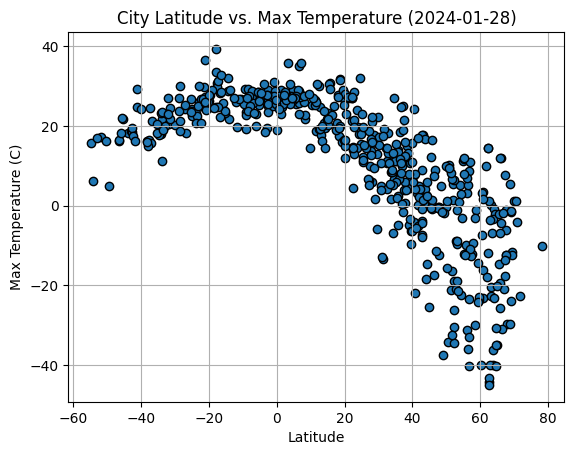

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
# time.strftime() and time.localtime() functions taken from StackOverflow: https://stackoverflow.com/questions/12400256/converting-epoch-time-into-the-datetime
date = time.strftime("%Y-%m-%d", time.localtime(city_data_df.loc[0]["Date"]))
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

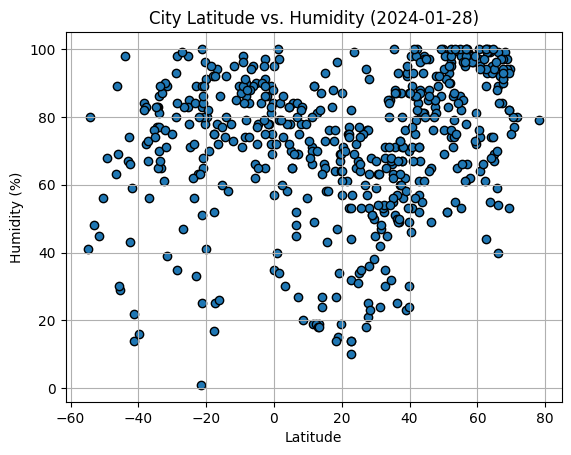

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

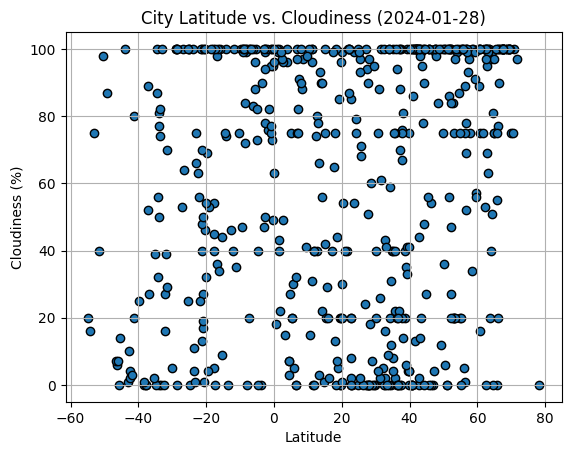

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

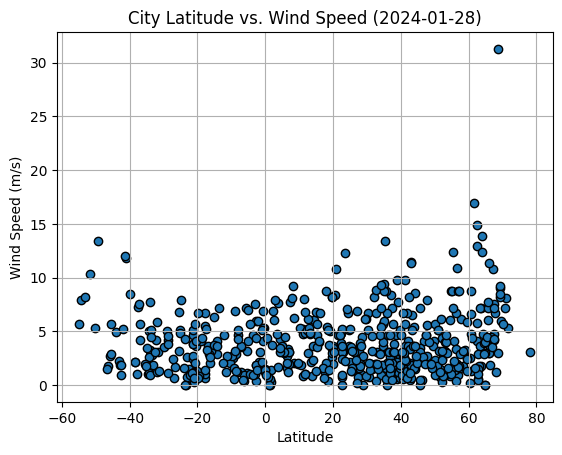

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_x, annotate_y, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # xycoords parameter taken from Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
    plt.annotate(line_eq, (annotate_x, annotate_y), xycoords='axes fraction', fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,11.27,86,20,8.75,GB,1706476466
2,longyearbyen,78.2186,15.6401,-10.09,79,0,3.09,SJ,1706476248
4,ust'-kut,56.7938,105.7672,-40.31,100,78,0.89,RU,1706476467
6,ribeira grande,38.5167,-28.7000,14.87,62,40,4.63,PT,1706476467
9,kenora,49.8167,-94.4337,-0.46,100,75,4.12,CA,1706476468


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,18.23,98,100,4.92,NZ,1706476466
3,bredasdorp,-34.5322,20.0403,20.04,77,100,1.00,ZA,1706476241
5,uturoa,-16.7333,-151.4333,28.22,78,36,3.67,PF,1706476467
7,forbes,-33.3833,148.0167,21.30,65,0,2.77,AU,1706476468
8,kismayo,-0.3582,42.5454,26.84,84,95,5.32,SO,1706476468


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6158386279309322


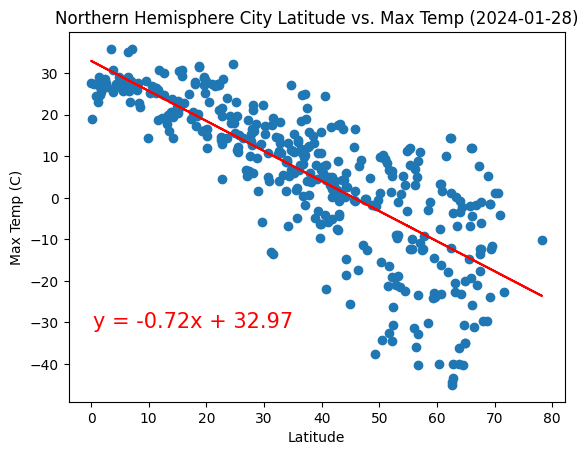

In [87]:
# Linear regression on Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.05, 0.2, title, x_label, y_label)

The r-value is: 0.3969325851034913


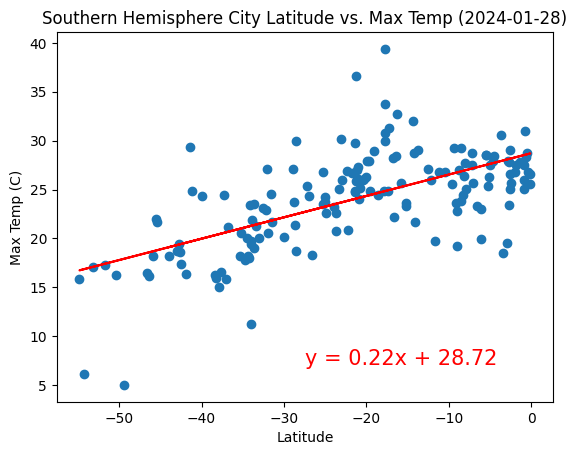

In [88]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:**
Based on the two above scatter plots, we can see that in the northern hemisphere, max temperature decreases as latitude increases, signifying a negative correlation. In the southern hemisphere, max temperature increases as latitude increases, signifying a positive correlation (although not as strong as the northern hemisphere's). To summarize both of these at once, as latitude grows away from the equator, either positvely or negatively, the max temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18451037944503068


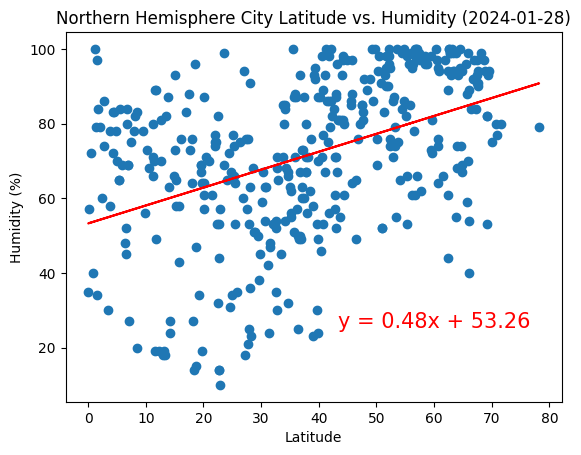

In [89]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0.55, 0.2, title, x_label, y_label)

The r-value is: 0.12274619699295101


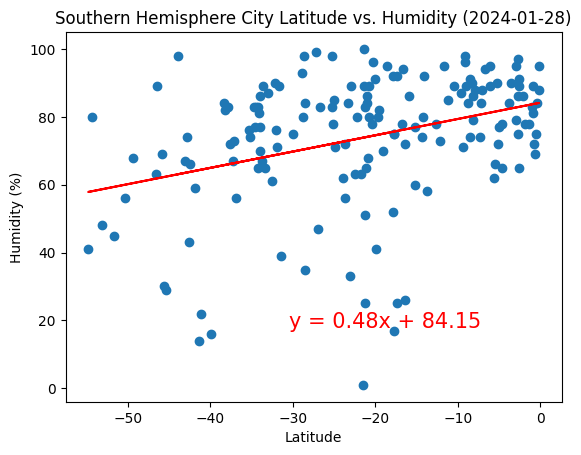

In [90]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 0.45, 0.2, title, x_label, y_label)

**Discussion about the linear relationship:**
Based on the two above scatter plots, we can see that in the northern hemisphere, humidity generally increases as latitude increases, signifying a slight positive correlation. This same correlation is also present in the southern hemisphere. To summarize, as latitude increases negatively away from the equator, the humidity will decrease, while as latitude increases positively away from the equator, the humidity will increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06040848561190454


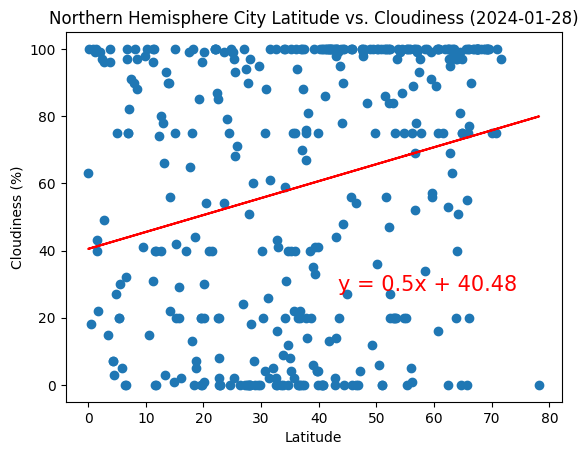

In [91]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0.55, 0.3, title, x_label, y_label)

The r-value is: 0.17471644983511306


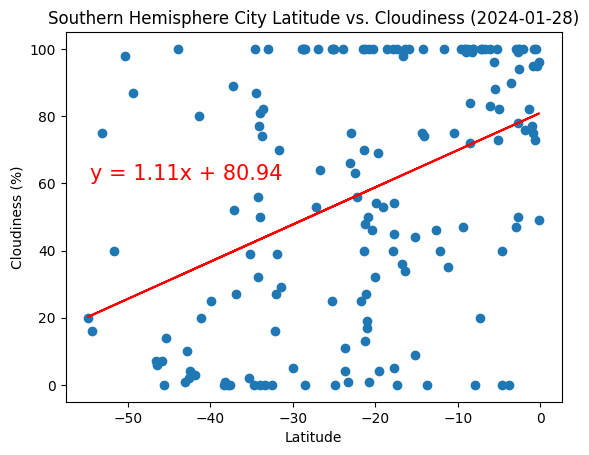

In [95]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 0.05, 0.6, title, x_label, y_label)

**Discussion about the linear relationship:**
Based on the two above scatter plots, we can see that in the northern hemisphere, cloudiness does increase as latitude increases, but based on our r-value, this positive correlation is very weak. The southern hemisphere also shares this weak positive correlation. One observation we can make is that the northern hemisphere contains noticably more data points for cloudiness, which may be a possible reason for the southern hemisphere's slightly stronger correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022327093229157196


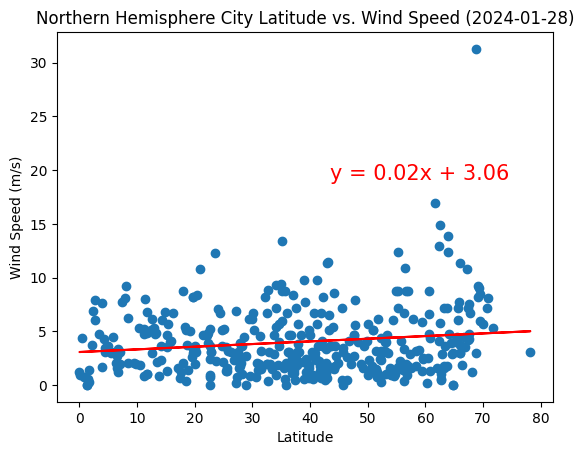

In [98]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0.55, 0.6, title, x_label, y_label)

The r-value is: 0.0570280130902871


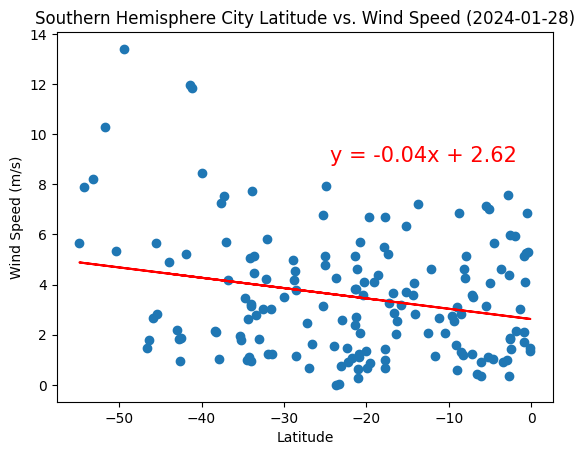

In [100]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 0.55, 0.65, title, x_label, y_label)

**Discussion about the linear relationship:**
Based on the two above scatter plots, we can see that in the northern hemisphere, wind speed very slightly increases as latitude increases, indicating a very minor positive correlation. In the southern hemisphere, wind speed slightly decreases as latitude increases, creating a stronger negative correlation than the northern hemisphere's. Due to how minor these correlations are, we can observe that latitude has minimum effect on wind speed when compared to max temperature, humidity, and cloudiness.